In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings(action="ignore")

In [83]:
# importing the dataset from the csv file
df = pd.read_csv("Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [84]:
encoder = LabelEncoder()
df["flight"] = encoder.fit_transform(df["flight"])

In [85]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [86]:
encode_airlines = {}
i = 1
for x in df["airline"].unique():
    encode_airlines[x] = i
    i += 1
encode_airlines

{'SpiceJet': 1,
 'AirAsia': 2,
 'Vistara': 3,
 'GO_FIRST': 4,
 'Indigo': 5,
 'Air_India': 6}

In [87]:
df["airline"] = df["airline"].map(encode_airlines)

In [88]:
df["source_city"].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [89]:
df["destination_city"].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [90]:
encode_city = {}
i = 1
for x in df["source_city"].unique():
    encode_city[x] = i
    i += 1
encode_city

{'Delhi': 1,
 'Mumbai': 2,
 'Bangalore': 3,
 'Kolkata': 4,
 'Hyderabad': 5,
 'Chennai': 6}

In [91]:
df["source_city"] = df["source_city"].map(encode_city)
df["destination_city"] = df['destination_city'].map(encode_city)

In [92]:
df.head(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,1,1408,1,Evening,zero,Night,2,Economy,2.17,1,5953
1,1,1,1387,1,Early_Morning,zero,Morning,2,Economy,2.33,1,5953


In [93]:
encode_arrival_time = {}
i = 1
for x in df["arrival_time"].unique():
    encode_arrival_time[x] = i
    i += 1
encode_arrival_time

{'Night': 1,
 'Morning': 2,
 'Early_Morning': 3,
 'Afternoon': 4,
 'Evening': 5,
 'Late_Night': 6}

In [94]:
df["departure_time"] = df["departure_time"].map(encode_arrival_time)
df["arrival_time"] = df["arrival_time"].map(encode_arrival_time)

In [95]:
df["class"] = df["class"].map({"Economy":1,"Business":2})

In [96]:
df.head(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,1,1408,1,5,zero,1,2,1,2.17,1,5953
1,1,1,1387,1,3,zero,2,2,1,2.33,1,5953


In [97]:
df["stops"].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [98]:
df["stops"] = df["stops"].replace(["zero","one","two_or_more"],[0,1,2])

In [99]:
df.dtypes

Unnamed: 0            int64
airline               int64
flight                int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

<AxesSubplot:>

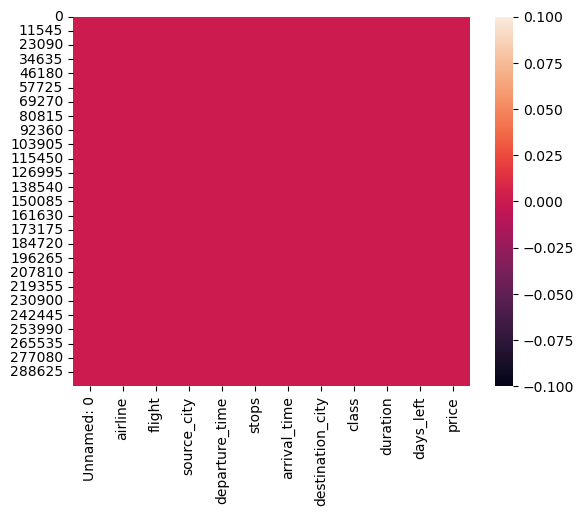

In [100]:
sns.heatmap(df.isnull())

In [101]:
df.drop(columns=["Unnamed: 0","airline","stops"],inplace=True) # removing multicolnear features 

<AxesSubplot:>

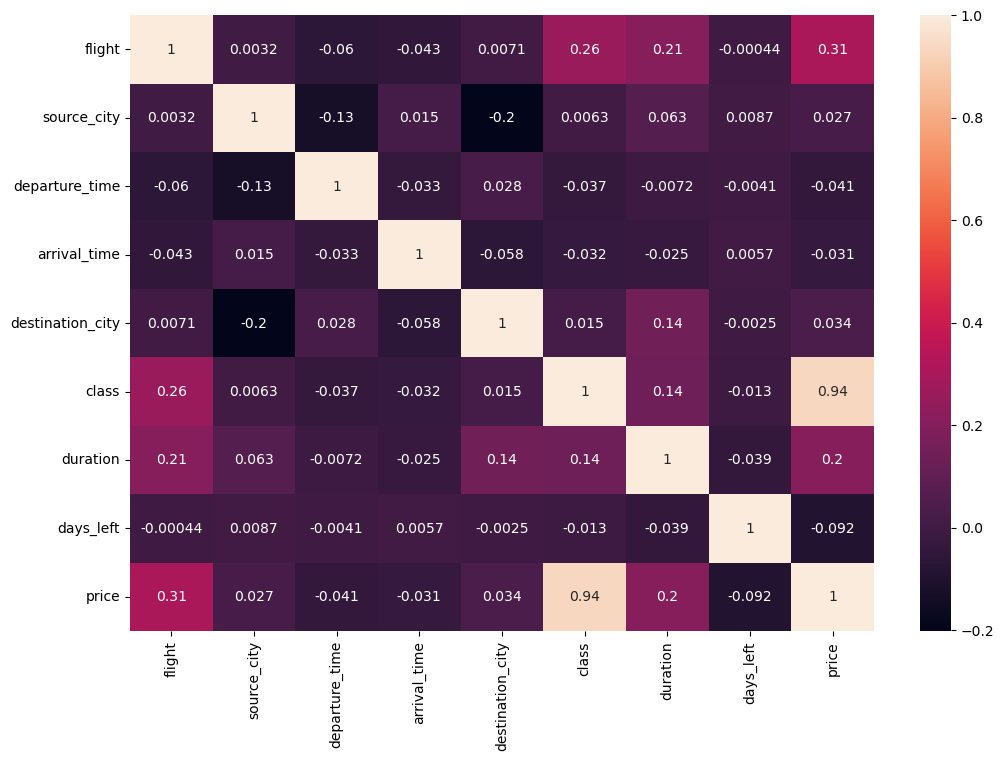

In [102]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'Target' is the target variable, and other columns are features
features = df.drop('price', axis=1)
target = df['price']

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

# Step 2: Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 3: Create and train the Decision Tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
linear_predictions = linear_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)

# Step 5: Evaluate the models using metrics
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

# Step 6: Display or use the metrics
print("Linear Regression Metrics:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R-squared: {linear_r2}")

print("\nDecision Tree Metrics:")
print(f"Mean Squared Error: {tree_mse}")
print(f"R-squared: {tree_r2}")


Linear Regression Metrics:
Mean Squared Error: 54125206.043024905
R-squared: 0.8950916019206994

Decision Tree Metrics:
Mean Squared Error: 9327302.455237987
R-squared: 0.9819213185405279
